# A shared-reflector isomorphic Yagi

In [1]:
from isomorphic_yagis import differential_evolution, evaluate_antenna
from isomorphic_yagis.utils import BANDS, PARAMETER_LIMITS, plot_population, plot_results

In [2]:
# For a single reflector, we have to override the size of all reflectors to be the same
# Here, we're setting them all to whatever the 20m reflector is, arbitrarily
override_values = {f"reflector_length_{band}": "reflector_length_20" for band in BANDS}

# To allow the reflector a full range in parameter space, we have to override its limits
# Overriding is the last thing that happens when clipping an antenna to its limits, so
# we only have to override the size of the reflector we are setting all others to
parameter_limits = PARAMETER_LIMITS | {"reflector_length_20": (0.01, 0.99)}


In [3]:
# We'll run a differential evolution experiment with 200 antennas, 
# for 100 generations, with these parameter limits and override values
results = differential_evolution(
    n_population=500, 
    n_generations=200, 
    limits=parameter_limits, 
    override_values=override_values
)

2023-07-07 18:48:23,675	INFO worker.py:1636 -- Started a local Ray instance.
 74%|███████▍  | 149/200 [2:44:33<3:31:32, 248.86s/it] 

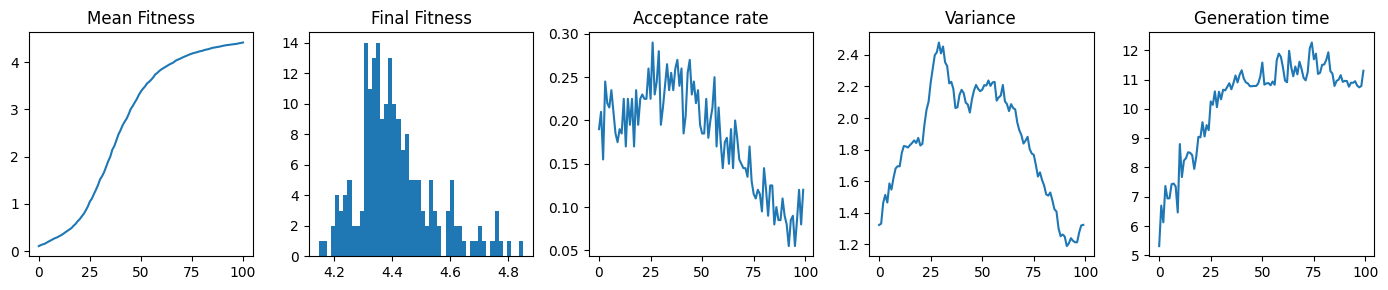

In [ ]:
# How'd our experiment go ?
antennas, best_antenna = plot_results(results)

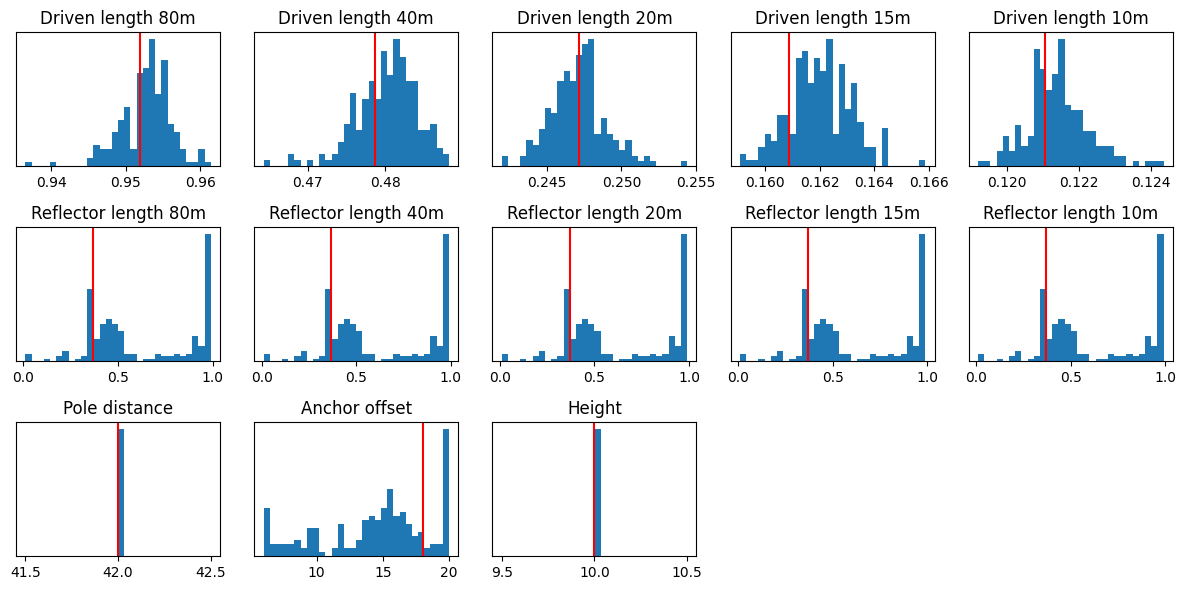

In [ ]:
# What does the final antenna population look like ?
plot_population(antennas, results["fitness"])

In [ ]:
# Which is our best antenna ?
best_antenna

{'driven_length_80': 0.9518835199862796,
 'reflector_length_80': 0.3682137390780771,
 'driven_length_40': 0.47861066941038577,
 'reflector_length_40': 0.3682137390780771,
 'driven_length_20': 0.24713858924627558,
 'reflector_length_20': 0.3682137390780771,
 'driven_length_15': 0.16085962114489077,
 'reflector_length_15': 0.3682137390780771,
 'driven_length_10': 0.12106928132253716,
 'reflector_length_10': 0.3682137390780771,
 'anchor_offset': 18.045444316648613,
 'pole_distance': 42.0,
 'height': 10.0}

In [ ]:
# How does it perform on various bands ?
evaluate_antenna(best_antenna, write=True)

{'80': {'gain': 5.911489, 'swr': 1.070339886764569},
 '40': {'gain': 7.972141, 'swr': 1.4700450178247997},
 '20': {'gain': 7.533467, 'swr': 1.4753684198393247},
 '15': {'gain': 8.974057, 'swr': 1.4595443311995617},
 '10': {'gain': 7.678463, 'swr': 1.4959578826791895}}